## Preprocess and Explore the Data

Step 1 Load Data Using YFinance

In [2]:
import yfinance as yf
import pandas as pd

tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2026-01-15'

data = yf.download(tickers, start=start_date, end=end_date)

data.head()

[*********************100%***********************]  3 of 3 completed


Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-01-02  60.385983  170.589630  14.620667  60.415208  171.793724   
2015-01-05  60.561314  167.508865  14.006000  60.583231  169.709428   
2015-01-06  60.736698  165.931030  14.085333  60.919354  168.339192   
2015-01-07  60.773151  167.998718  14.063333  60.846212  168.339186   
2015-01-08  60.678215  170.979889  14.041333  60.722051  171.195802   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-01-02  14.883333  60.217937  169.551627  14.217333  60.225245   
2015-01-05  14.433333  60.422494  167.201620  13.810667  60.451719   
2015-01-06  14.280000  60.663637  165.133838  13.614000  60.663637   
2015-01-07  14.318667  60.678173  166.811249  13.985333  60.743926   
2015-01-08  14.253333  60.619764  169.393830  14.000667  60.722051   

Price                               Volume                       
Ticker             SPY       TSLA      BND        SPY      TSLA  
Date                                                             
2015-01-02  171.378523  14.858000  2218800  121465900  71466000  
2015-01-05  169.543350  14.303333  5820100  169632600  80527500  
2015-01-06  167.816035  14.004000  3887600  209151400  93928500  
2015-01-07  167.259661  14.223333  2433400  125346700  44526000  
2015-01-08  169.410429  14.187333  1873400  147217800  51637500

Split into separate DataFrames:

In [3]:
tsla = data.xs('TSLA', level=1, axis=1)
bnd = data.xs('BND', level=1, axis=1)
spy = data.xs('SPY', level=1, axis=1)


STEP 2: Data Cleaning and Understanding

2.1 Basic Statistics

In [4]:
tsla.describe()

Price,Close,High,Low,Open,Volume
count,2775.000000,2775.000000,2775.000000,2775.000000,2.775000e+03
mean,138.472937,141.534064,135.271181,138.505925,1.108480e+08
std,131.682073,134.616345,128.668762,131.791350,7.145365e+07
min,9.578000,10.331333,9.403333,9.488000,1.062000e+07
25%,17.851666,18.087000,17.588000,17.836666,6.758150e+07
50%,91.625999,94.484001,89.113998,93.066666,9.264600e+07
75%,242.028336,247.846664,236.978333,242.901665,1.282366e+08
max,489.880005,498.829987,485.329987,489.880005,9.140820e+08


In [5]:
bnd.describe()

Price,Close,High,Low,Open,Volume
count,2775.000000,2775.000000,2775.000000,2775.000000,2.775000e+03
mean,67.325729,67.424459,67.224865,67.328207,4.485148e+06
std,4.685294,4.692171,4.676260,4.685213,2.918896e+06
min,59.698605,59.772454,59.661702,59.728130,0.000000e+00
25%,63.436432,63.504390,63.370294,63.438510,2.172700e+06
50%,66.492088,66.634788,66.376233,66.478953,4.175700e+06
75%,71.237347,71.377843,71.094408,71.256975,6.043050e+06
max,76.068108,76.161593,76.034102,76.127594,3.396300e+07


In [6]:
spy.describe()

Price,Close,High,Low,Open,Volume
count,2775.000000,2775.000000,2775.000000,2775.000000,2.775000e+03
mean,339.074725,340.845875,337.015720,339.015877,8.604954e+07
std,141.925744,142.569517,141.139477,141.905190,4.386106e+07
min,154.980957,156.031910,152.881607,154.540233,2.027000e+07
25%,219.599655,221.038725,218.370057,219.349081,5.881420e+07
50%,301.538605,303.765231,299.861241,302.125077,7.570750e+07
75%,423.938446,425.885996,421.455155,423.759636,9.923995e+07
max,695.159973,696.090027,691.349976,695.489990,5.072443e+08


2.2 Check Data Types

In [7]:
tsla.dtypes

Price
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [8]:
bnd.dtypes

Price
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [9]:
spy.dtypes

Price
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

2.3 Missing Values

In [10]:
tsla.isnull().sum()

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [11]:
bnd.isnull().sum()

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [12]:
spy.isnull().sum()

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

STEP 3: Exploratory Data Analysis (EDA)

3.1 Closing Price Over Time (Trend)

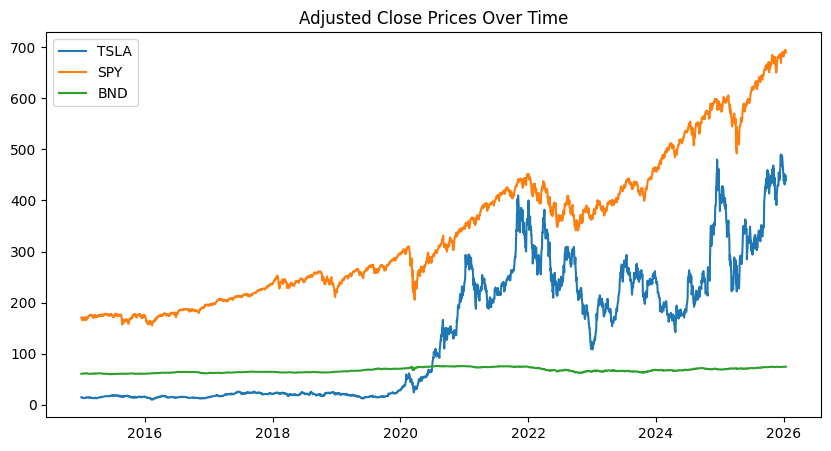

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(tsla['Close'], label='TSLA')
plt.plot(spy['Close'], label='SPY')
plt.plot(bnd['Close'], label='BND')
plt.legend()
plt.title("Adjusted Close Prices Over Time")
plt.show()


3.2 Daily Percentage Change (Returns)

In [14]:
tsla['returns'] = tsla['Close'].pct_change()
bnd['returns'] = bnd['Close'].pct_change()
spy['returns'] = spy['Close'].pct_change()


Plot:

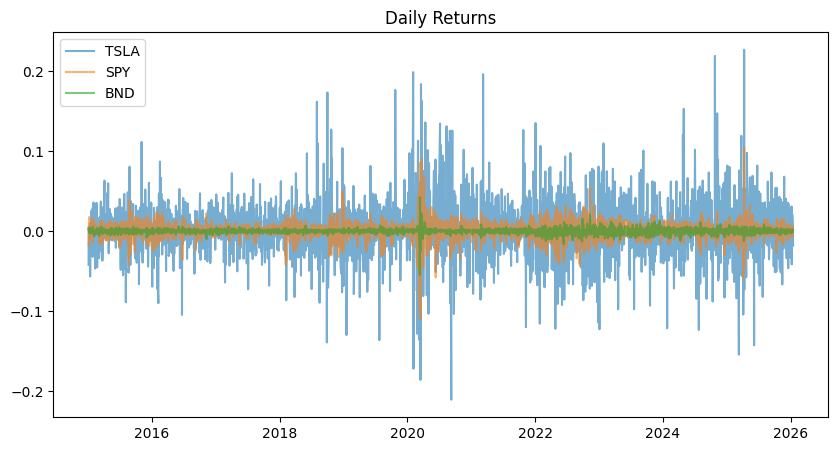

In [15]:
plt.figure(figsize=(10,5))
plt.plot(tsla['returns'], alpha=0.6, label='TSLA')
plt.plot(spy['returns'], alpha=0.6, label='SPY')
plt.plot(bnd['returns'], alpha=0.6, label='BND')
plt.legend()
plt.title("Daily Returns")
plt.show()


3.3 Rolling Volatility (Risk Over Time)

In [16]:
rolling_window = 30

tsla['volatility'] = tsla['returns'].rolling(rolling_window).std()
spy['volatility'] = spy['returns'].rolling(rolling_window).std()
bnd['volatility'] = bnd['returns'].rolling(rolling_window).std()


Plot:

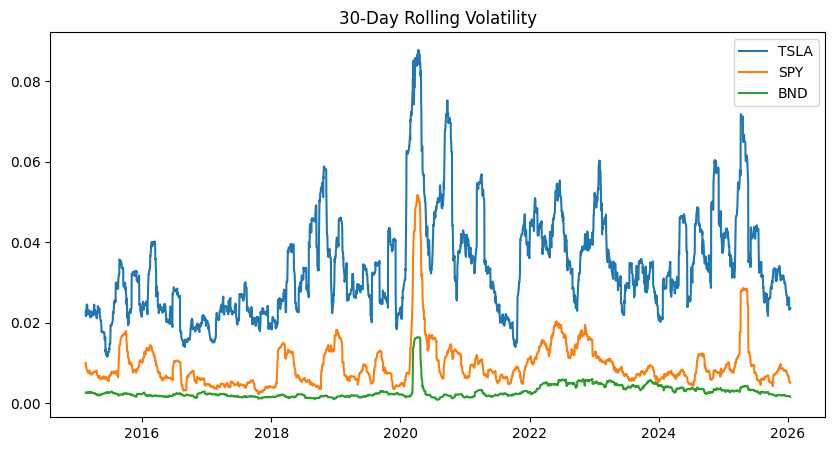

In [17]:
plt.figure(figsize=(10,5))
plt.plot(tsla['volatility'], label='TSLA')
plt.plot(spy['volatility'], label='SPY')
plt.plot(bnd['volatility'], label='BND')
plt.legend()
plt.title("30-Day Rolling Volatility")
plt.show()


3.4 Outlier Detection (Extreme Days)

In [18]:
tsla_outliers = tsla[tsla['returns'].abs() > tsla['returns'].std() * 3]
tsla_outliers.head()


Price,Close,High,Low,Open,Volume,returns,volatility
Date,,,,,,,
2015-11-04,15.442000,15.516000,15.013333,15.133333,190896000,0.111735,0.032129
2018-08-02,23.302668,23.332666,21.544001,21.896000,348225000,0.161880,0.039940
2018-08-07,25.304667,25.830667,22.610001,22.922667,463137000,0.109886,0.043392
2018-09-28,17.651333,18.533333,17.370667,18.017332,504745500,-0.139015,0.041406
2018-10-01,20.713333,20.762667,20.070000,20.384666,326664000,0.173471,0.050246


STEP 4: Seasonality & Stationarity (ADF Test)

In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, name):
    result = adfuller(series.dropna())
    print(f"{name} ADF Statistic: {result[0]}")
    print(f"{name} p-value: {result[1]}\n")

adf_test(tsla['Close'], "TSLA Price")
adf_test(tsla['returns'], "TSLA Returns")


TSLA Price ADF Statistic: -0.7801569882105652
TSLA Price p-value: 0.8248814297221106

TSLA Returns ADF Statistic: -53.0196185442436
TSLA Returns p-value: 0.0



🔹 Interpretation

p-value > 0.05 → non-stationary

p-value < 0.05 → stationary

STEP 5: Risk Metrics

   5.1 Value at Risk (VaR) 

In [20]:
VaR_95 = tsla['returns'].quantile(0.05)
VaR_95


np.float64(-0.05252946182633338)

5.2 Sharpe Ratio

In [21]:
risk_free_rate = 0.01 / 252  # daily risk-free rate

sharpe_tsla = (tsla['returns'].mean() - risk_free_rate) / tsla['returns'].std()
sharpe_tsla


np.float64(0.050763883492056676)

Final Save

In [26]:
import os

os.makedirs('../data/processed', exist_ok=True)


In [27]:
clean_data = pd.DataFrame({
    'TSLA_price': tsla['Close'],
    'TSLA_returns': tsla['returns'],
    'BND_price': bnd['Close'],
    'BND_returns': bnd['returns'],
    'SPY_price': spy['Close'],
    'SPY_returns': spy['returns'],
})

clean_data = clean_data.dropna()


In [28]:
clean_data.to_csv('../data/processed/task1_clean_data.csv')